In [1]:
!pip install fast_ml

     |████████████████████████████████| 42 kB 1.4 MB/s eta 0:00:011


# Megaline Machine Learning

## Importing Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from fast_ml.model_development import train_valid_test_split

## Loading the Data

In [92]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## Looking at the datatypes

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


## Dividing the data into a Features Dataframe 

In [94]:
features = df.drop(['is_ultra'], axis=1)
features.head()

,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96
2,77.0,467.66,86.0,21060.45
3,106.0,745.53,81.0,8437.39
4,66.0,418.74,1.0,14502.75


## Dividing the data into a Target Dataframe

In [95]:
target = df['is_ultra']

## Splitting the Data into training data and test data

In [96]:
features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(df, target='is_ultra',train_size=0.6, valid_size=0.2, test_size=0.2)

## Machine Learning Algorithms

### Used the RandomForestClassifier because it has the highest Accuracy, typically.

### Tune hyperparameters on Validation Set

#### Used n_estimators = 9 which gave us the best possible score of 98%, at 10 the data becomes overfit

In [99]:
best_score = 0
best_est = 0
for est in range(1, 11): # choose hyperparameter range
    model = RandomForestClassifier(random_state=54321, n_estimators=est) # set number of trees
    model.fit(features_train, target_train) # train model on training set
    score = model.score(features_valid, target_valid) # calculate accuracy score on validation set
    print(f"Est: {est}, Score: {score}")
    if score > best_score:
        best_score = score
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

rfc_model = RandomForestClassifier(random_state=54321, n_estimators=10) # change n_estimators to get best model
rfc_model.fit(features_valid, target_valid)

Est: 1, Score: 0.7107309486780715
Est: 2, Score: 0.7636080870917574
Est: 3, Score: 0.7636080870917574
Est: 4, Score: 0.7776049766718507
Est: 5, Score: 0.7589424572317263
Est: 6, Score: 0.7667185069984448
Est: 7, Score: 0.7667185069984448
Est: 8, Score: 0.7729393468118196
Est: 9, Score: 0.7667185069984448
Est: 10, Score: 0.7713841368584758
Accuracy of the best model on the validation set (n_estimators = 4): 0.7776049766718507


RandomForestClassifier(n_estimators=10, random_state=54321)

In [100]:
model = RandomForestClassifier(n_estimators = 4, random_state=54321)
model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=4, random_state=54321)

### Used model.predict on the validation set to get a prediction for the data

In [101]:
y_pred = model.predict(features_test)

### Created a confusion matrix with the validation data

In [102]:
conf_matrix = metrics.confusion_matrix(target_test, y_pred)

### Creating a Heat Map to show the predicted labels versus the actual labels on the validation set. 

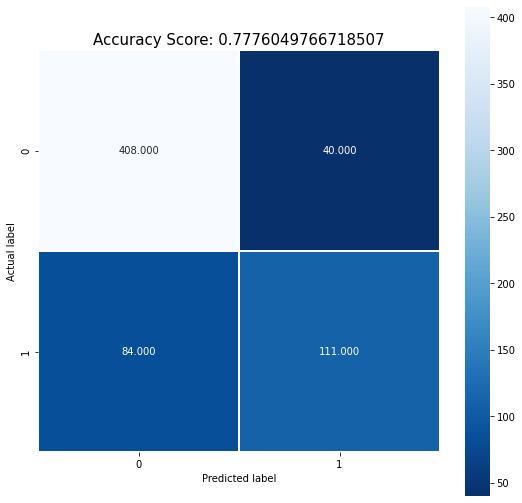

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(best_score)
plt.title(all_sample_title, size = 15);

### Created a function to test the model based off of the test data to see the scores for the model.

In [104]:
def test_model(model, features, target):
    y_pred = model.predict(features)
    
    print('Precision: %.3f' % precision_score(target, y_pred))
    print('Recall: %.3f' % recall_score(target, y_pred))
    print('F1: %.3f' % f1_score(target, y_pred))
    print('Accuracy: %.3f' % accuracy_score(target, y_pred))

### Tested the precision, recall, F1 score, and accuracy on the test data. The precision and accuracy is around 75-80% and is well within an acceptable limit.

In [105]:
test_model(model, features_test, target_test)

Precision: 0.735
Recall: 0.569
F1: 0.642
Accuracy: 0.807


In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(features_train, target_train)

print('Original dataset shape', Counter())
print('Resample dataset shape', Counter(y_ros))

### Used the DecisionTreeClassifier to see if it could beat the accuracy score of RandomForest but as theory suggests, it does not. 

In [88]:
# < create a loop for max_depth from 1 to 5 >
model = DecisionTreeClassifier(random_state = 12345, max_depth=4)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
result = accuracy_score(target_valid, predictions_valid)

print(f"max_depth = 4 : ", end = "")
print(result)
    

max_depth = 4 : 0.776049766718507


### Checking LogisticRegression for accuracy score.

In [89]:
model = LogisticRegression(
    random_state=54321, solver="liblinear"
)
model.fit(features_train, target_train)

score_train = model.score(features_train, target_train)
score_valid = model.score(features_valid, target_valid)

print(
    "Accuracy of the logistic regression model on the training set:",
    score_train,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    score_valid,
)

Accuracy of the logistic regression model on the training set: 0.7650414937759336
Accuracy of the logistic regression model on the validation set: 0.7216174183514774


## CONCLUSION:

### 1. The RandomForestClassifier algorithm gives us the maximum accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.